### Stock Prediction - FB Prophet Model

In [1]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import packages
import pandas as pd
import numpy as np
import os
import datetime
import pandas_datareader.data as web
from sklearn import metrics

#to plot within notebook
import matplotlib.pyplot as plt

In [2]:
# Data Start and end date
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2020, 12, 10)

Let's get the historical data using web. For simplicity of model, we will be using only Date and Close columns. 

In [3]:
# Get data from yahoo portal
jpm_df = web.DataReader("JPM", 'yahoo',start, end)

# Sample results
jpm_df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,50.250000,48.083332,49.833332,48.583332,12019200.0,26.016140
2000-01-04,47.458332,46.125000,47.083332,47.250000,11723400.0,25.445301
2000-01-05,48.375000,46.000000,46.833332,46.958332,8714550.0,25.288227


In [4]:
# Check last records
jpm_df.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-08,122.330002,120.760002,121.040001,122.000000,9592100.0,121.127670
2020-12-09,123.300003,120.440002,123.169998,121.050003,13073900.0,120.184471
2020-12-10,120.779999,119.559998,119.989998,120.269997,13668400.0,119.410042


### Time series model - FB Prophet:
For simplicity, we will use one dimension that is time for the future stock prediction.

Prophet is open source software released by Facebook and commonly used procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. It provides us with the ability to make time series predictions with good accuracy using simple intuitive parameters.

In [5]:
#!conda install -c conda-forge fbprophet -y

In [6]:
# Import packages
from fbprophet import Prophet

In [7]:
# Make the copy of original data
df = jpm_df.copy()

In [8]:
# Reset index
df= df.reset_index()

In [9]:
# Check sample data
df.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,50.250000,48.083332,49.833332,48.583332,12019200.0,26.016140
1,2000-01-04,47.458332,46.125000,47.083332,47.250000,11723400.0,25.445301
2,2000-01-05,48.375000,46.000000,46.833332,46.958332,8714550.0,25.288227


In [10]:
# Prophet expects Dataframe must have columns "ds" and "y" with the dates and values respectively.
df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True) 

In [11]:
# Keep only required columns
df = df[['ds','y']]

In [12]:
# Check df sample
df.head(3)

,ds,y
0,2000-01-03,48.583332
1,2000-01-04,47.250000
2,2000-01-05,46.958332


In [13]:
# Model initialization 
model = Prophet(daily_seasonality=False)

In [14]:
# Fit the data(train the model)
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [15]:
# Let's predict data for next two years or 730 days (365*2)
future = model.make_future_dataframe(periods=729)

In [16]:
# Prediction for future dates.
forecast = model.predict(future)

In [17]:
# forecast has number of various columns. ds is a date column and yhat is the median predicated value
forecast_valid = forecast[['ds','yhat']][:]
forecast_valid.rename(columns={'yhat': 'y'}, inplace=True)

In [18]:
# Print the last predicted value
print (f"JPM Closing price on {str(forecast_valid.iloc[-1]['ds'])[:10]} would be around ${round(forecast_valid.iloc[-1]['y'],2)}")

JPM Closing price on 2022-12-09 would be around $138.32


In [19]:
# create a date index for input data frame.
df['Date'] = pd.to_datetime(df.ds)
df.index = df['Date']

In [20]:
# Create a date index for forecast data frame.
forecast_valid['Date'] = pd.to_datetime(forecast_valid.ds)
forecast_valid.index = forecast_valid['Date']

In [21]:
# Le't look at Matrics

In [22]:
# Get predicted stock price
yhat = forecast_valid.y[:5270].values

In [23]:
# Get actual stock price
y= df.y[:].values

In [24]:
# Check values
yhat,y

(array([ 56.72086675,  56.72026126,  56.62832909, ..., 121.17797011,
        121.20415938, 121.35604423]),
 array([ 48.58333206,  47.25      ,  46.95833206, ..., 122.        ,
        121.05000305, 120.26999664]))

In [25]:
print('Coefficient of determination:',round(metrics.r2_score(y, yhat),2))

Coefficient of determination: 0.93


In [26]:
print("RMSE (root-mean-square error) is:",round(np.sqrt(metrics.mean_squared_error(y, yhat)),2))

RMSE (root-mean-square error) is: 7.05


In [27]:
print("Mean Squared Error is:", round(metrics.mean_squared_error(y, yhat),2))

Mean Squared Error is: 49.64


In [28]:
print("Mean Absolute Error is:" , round(metrics.mean_absolute_error(y, yhat),2))

Mean Absolute Error is: 4.83


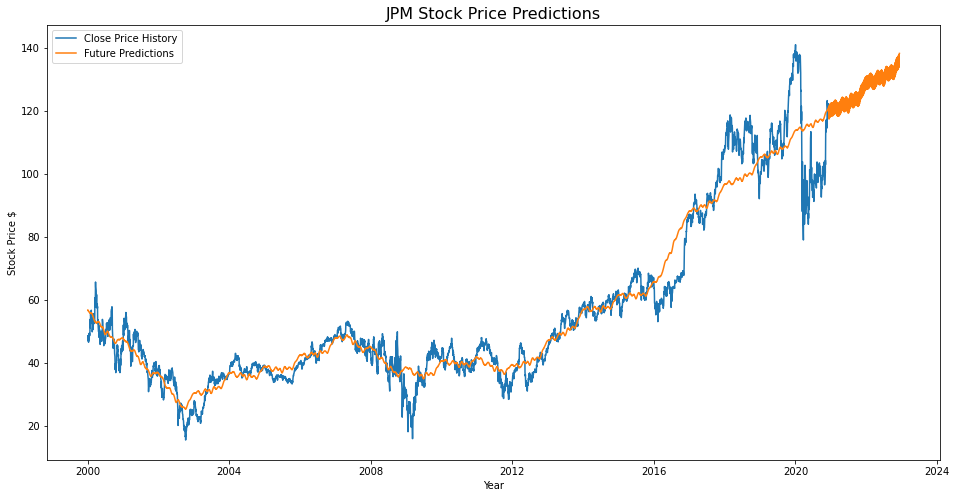

In [29]:
# Set plot figure size
plt.figure(figsize=(16,8))

# Plot the actual data
plt.plot(df['y'], label='Close Price History')

# plot the prophet predictions
plt.plot(forecast_valid['y'], label='Future Predictions')

# Label the chart
plt.title('JPM Stock Price Predictions', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Stock Price $')

# Show legends
plt.legend()

# Show the chart
plt.show()

#### Conclusion:
FB Prophet time series forecasting algorithms did not yield dramatically different result.Stock prediction is too complex to be solved by simple techniques.  

JPM predicted closing price on 2022-12-09 is $138.32